# LEARNING APPLICATIONS

In this notebook we will take a look at some indicative applications of machine learning techniques. We will cover content from [`learning.py`](https://github.com/aimacode/aima-python/blob/master/learning.py), for chapter 18 from Stuart Russel's and Peter Norvig's book [*Artificial Intelligence: A Modern Approach*](http://aima.cs.berkeley.edu/). Execute the cell below to get started:

In [1]:
from learning import *
from notebook import *

## CONTENTS

* MNIST Handwritten Digits
    * Loading and Visualising
    * Testing
* MNIST Fashion

## MNIST HANDWRITTEN DIGITS CLASSIFICATION

The MNIST Digits database, available from [this page](http://yann.lecun.com/exdb/mnist/), is a large database of handwritten digits that is commonly used for training and testing/validating in Machine learning.

The dataset has **60,000 training images** each of size 28x28 pixels with labels and **10,000 testing images** of size 28x28 pixels with labels.

In this section, we will use this database to compare performances of different learning algorithms.

It is estimated that humans have an error rate of about **0.2%** on this problem. Let's see how our algorithms perform!

NOTE: We will be using external libraries to load and visualize the dataset smoothly ([numpy](http://www.numpy.org/) for loading and [matplotlib](http://matplotlib.org/) for visualization). You do not need previous experience of the libraries to follow along.

### Loading MNIST Digits Data

Let's start by loading MNIST data into numpy arrays.

The function `load_MNIST()` loads MNIST data from files saved in `aima-data/MNIST`. It returns four numpy arrays that we are going to use to train and classify hand-written digits in various learning approaches.

In [2]:
train_img, train_lbl, test_img, test_lbl = load_MNIST()

Check the shape of these NumPy arrays to make sure we have loaded the database correctly.

Each 28x28 pixel image is flattened to a 784x1 array and we should have 60,000 of them in training data. Similarly, we should have 10,000 of those 784x1 arrays in testing data.

In [3]:
print("Training images size:", train_img.shape)
print("Training labels size:", train_lbl.shape)
print("Testing images size:", test_img.shape)
print("Training labels size:", test_lbl.shape)

Training images size: (60000, 784)
Training labels size: (60000,)
Testing images size: (10000, 784)
Training labels size: (10000,)


### Visualizing Data

To get a better understanding of the dataset, let's visualize some random images for each class from training and testing datasets.

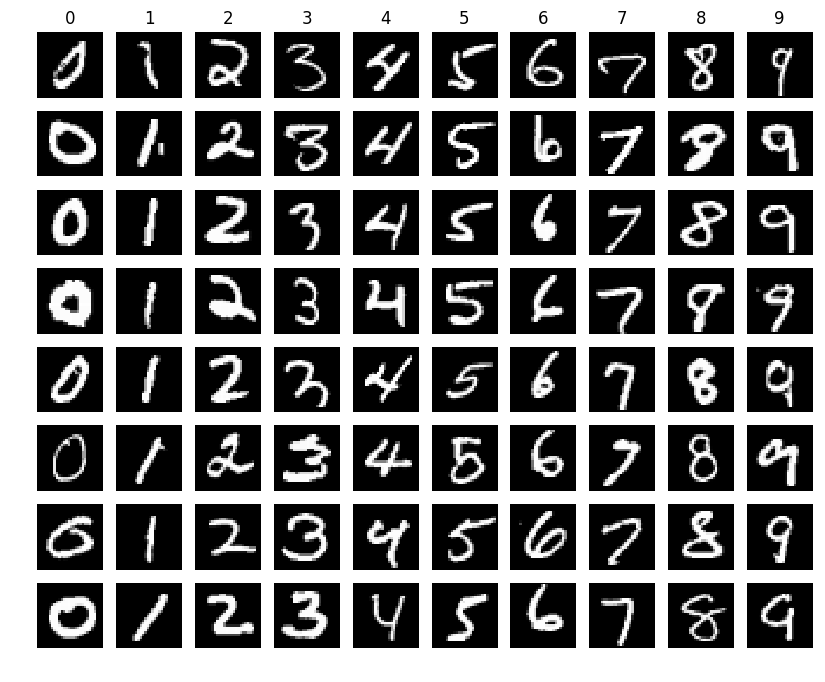

In [4]:
# takes 5-10 seconds to execute this
show_MNIST(train_lbl, train_img)

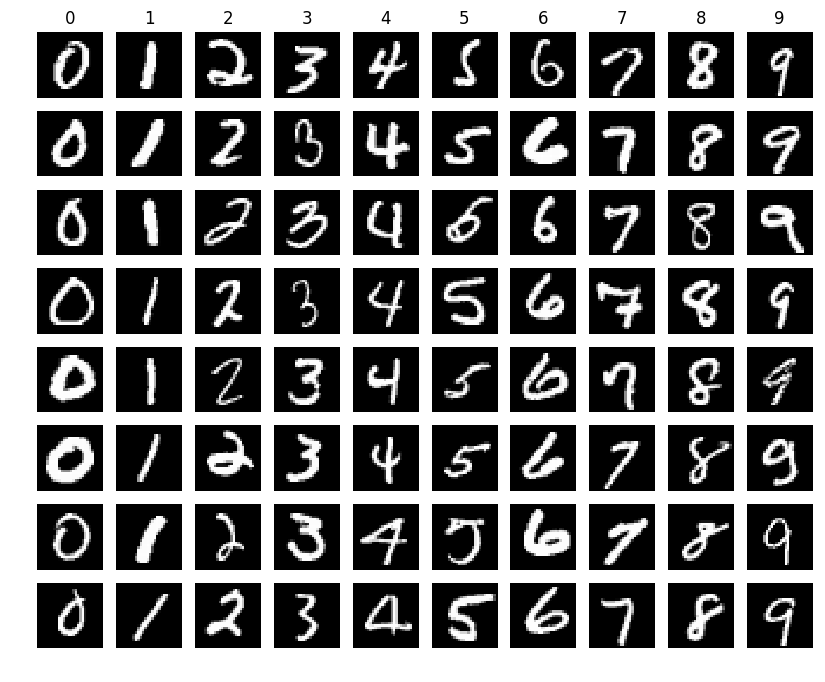

In [5]:
# takes 5-10 seconds to execute this
show_MNIST(test_lbl, test_img)

Let's have a look at the average of all the images of training and testing data.

Average of all images in training dataset.
Digit 0 : 5923 images.
Digit 1 : 6742 images.
Digit 2 : 5958 images.
Digit 3 : 6131 images.
Digit 4 : 5842 images.
Digit 5 : 5421 images.
Digit 6 : 5918 images.
Digit 7 : 6265 images.
Digit 8 : 5851 images.
Digit 9 : 5949 images.


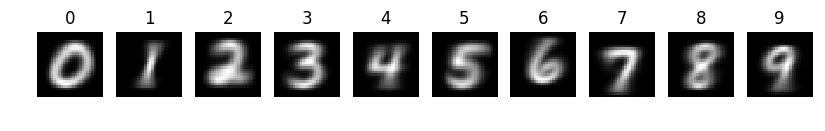

Average of all images in testing dataset.
Digit 0 : 980 images.
Digit 1 : 1135 images.
Digit 2 : 1032 images.
Digit 3 : 1010 images.
Digit 4 : 982 images.
Digit 5 : 892 images.
Digit 6 : 958 images.
Digit 7 : 1028 images.
Digit 8 : 974 images.
Digit 9 : 1009 images.


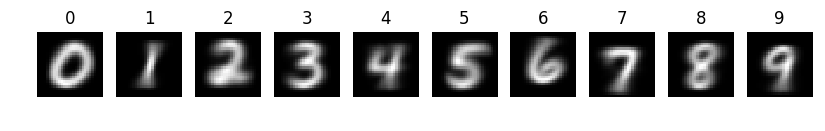

In [6]:
print("Average of all images in training dataset.")
show_ave_MNIST(train_lbl, train_img)

print("Average of all images in testing dataset.")
show_ave_MNIST(test_lbl, test_img)

## Testing

Now, let us convert this raw data into `DataSet.examples` to run our algorithms defined in `learning.py`. Every image is represented by 784 numbers (28x28 pixels) and we append them with its label or class to make them work with our implementations in learning module.

In [7]:
print(train_img.shape, train_lbl.shape)
temp_train_lbl = train_lbl.reshape((60000,1))
training_examples = np.hstack((train_img, temp_train_lbl))
print(training_examples.shape)

(60000, 784) (60000,)
(60000, 785)


Now, we will initialize a DataSet with our training examples, so we can use it in our algorithms.

In [8]:
# takes ~10 seconds to execute this
MNIST_DataSet = DataSet(examples=training_examples, distance=manhattan_distance)

Moving forward we can use `MNIST_DataSet` to test our algorithms.

### Plurality Learner

The Plurality Learner always returns the class with the most training samples. In this case, `1`.

In [9]:
pL = PluralityLearner(MNIST_DataSet)
print(pL(177))

1


Actual class of test image: 8


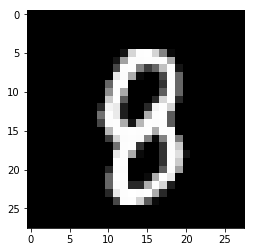

In [10]:
%matplotlib inline

print("Actual class of test image:", test_lbl[177])
plt.imshow(test_img[177].reshape((28,28)))

It is obvious that this Learner is not very efficient. In fact, it will guess correctly in only 1135/10000 of the samples, roughly 10%. It is very fast though, so it might have its use as a quick first guess.

### Naive-Bayes

The Naive-Bayes classifier is an improvement over the Plurality Learner. It is much more accurate, but a lot slower.

In [11]:
# takes ~45 Secs. to execute this

nBD = NaiveBayesLearner(MNIST_DataSet, continuous=False)
print(nBD(test_img[0]))

7


### k-Nearest Neighbors

We will now try to classify a random image from the dataset using the kNN classifier.

In [12]:
# takes ~20 Secs. to execute this
kNN = NearestNeighborLearner(MNIST_DataSet, k=3)
print(kNN(test_img[211]))

5


To make sure that the output we got is correct, let's plot that image along with its label.

Actual class of test image: 5


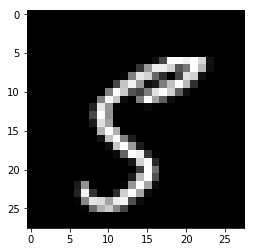

In [13]:
%matplotlib inline

print("Actual class of test image:", test_lbl[211])
plt.imshow(test_img[211].reshape((28,28)))

Hurray! We've got it correct. Don't worry if our algorithm predicted a wrong class. With this techinique we have only ~97% accuracy on this dataset.

## MNIST FASHION

Another dataset in the same format is [MNIST Fashion](https://github.com/zalandoresearch/fashion-mnist/blob/master/README.md). This dataset, instead of digits contains types of apparel (t-shirts, trousers and others). As with the Digits dataset, it is split into training and testing images, with labels from 0 to 9 for each of the ten types of apparel present in the dataset. The below table shows what each label means:

| Label | Description |
| ----- | ----------- |
|   0   | T-shirt/top |
|   1   | Trouser     |
|   2   | Pullover    |
|   3   | Dress       |
|   4   | Coat        |
|   5   | Sandal      |
|   6   | Shirt       |
|   7   | Sneaker     |
|   8   | Bag         |
|   9   | Ankle boot  |

Since both the MNIST datasets follow the same format, the code we wrote for loading and visualizing the Digits dataset will work for Fashion too! The only difference is that we have to let the functions know which dataset we're using, with the `fashion` argument. Let's start by loading the training and testing images:

In [14]:
train_img, train_lbl, test_img, test_lbl = load_MNIST(fashion=True)

### Visualizing Data

Let's visualize some random images for each class, both for the training and testing sections:

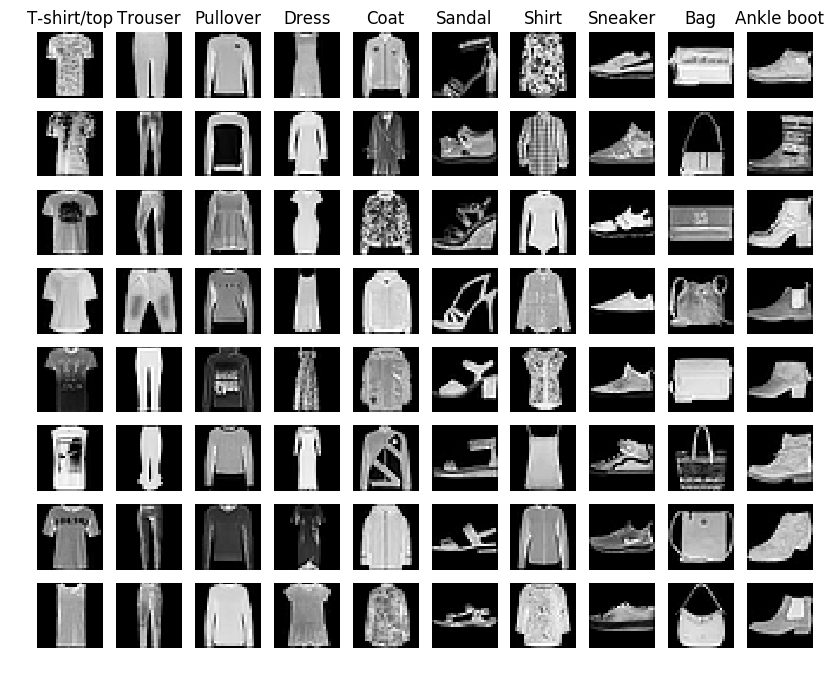

In [15]:
# takes 5-10 seconds to execute this
show_MNIST(train_lbl, train_img, fashion=True)

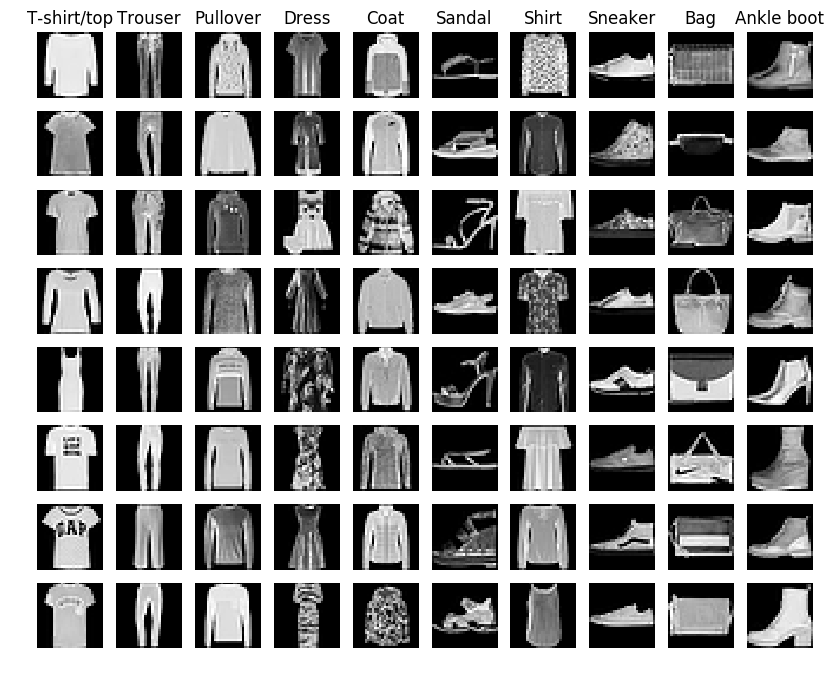

In [16]:
# takes 5-10 seconds to execute this
show_MNIST(test_lbl, test_img, fashion=True)

Let's now see how many times each class appears in the training and testing data:

Average of all images in training dataset.
Apparel 0 : 6000 images.
Apparel 1 : 6000 images.
Apparel 2 : 6000 images.
Apparel 3 : 6000 images.
Apparel 4 : 6000 images.
Apparel 5 : 6000 images.
Apparel 6 : 6000 images.
Apparel 7 : 6000 images.
Apparel 8 : 6000 images.
Apparel 9 : 6000 images.


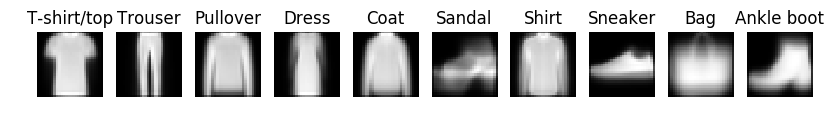

Average of all images in testing dataset.
Apparel 0 : 1000 images.
Apparel 1 : 1000 images.
Apparel 2 : 1000 images.
Apparel 3 : 1000 images.
Apparel 4 : 1000 images.
Apparel 5 : 1000 images.
Apparel 6 : 1000 images.
Apparel 7 : 1000 images.
Apparel 8 : 1000 images.
Apparel 9 : 1000 images.


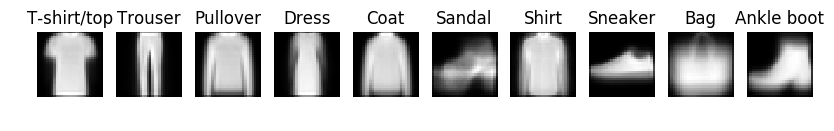

In [17]:
print("Average of all images in training dataset.")
show_ave_MNIST(train_lbl, train_img, fashion=True)

print("Average of all images in testing dataset.")
show_ave_MNIST(test_lbl, test_img, fashion=True)

Unlike Digits, in Fashion all items appear the same number of times.

## Testing

We will now begin testing our algorithms on Fashion.

First, we need to convert the dataset into the `learning`-compatible `Dataset` class:

In [18]:
temp_train_lbl = train_lbl.reshape((60000,1))
training_examples = np.hstack((train_img, temp_train_lbl))

In [19]:
# takes ~10 seconds to execute this
MNIST_DataSet = DataSet(examples=training_examples, distance=manhattan_distance)

### K-Nearest Neighbors

With the dataset in hand, we will first test how the kNN algorithm performs:

In [20]:
# takes ~20 Secs. to execute this
kNN = NearestNeighborLearner(MNIST_DataSet, k=3)
print(kNN(test_img[211]))

1


The output is 1, which means the item at index 211 is a trouser. Let's see if the prediction is correct:

Actual class of test image: 1


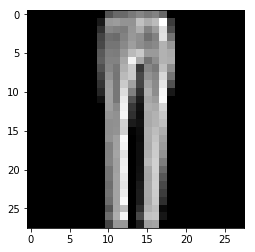

In [21]:
%matplotlib inline

print("Actual class of test image:", test_lbl[211])
plt.imshow(test_img[211].reshape((28,28)))

Indeed, the item was a trouser! The algorithm classified the item correctly.